# Augmented CycleGAN: Learning Many-to-Many Mappings from Unpaired Data

- Amjad Almahairi, Sai Rajeswar, Alessandro Sordoni, Philip Bachman, Aaron Courville

https://arxiv.org/abs/1802.10151

### Goal: Learn a mapping between domains X and Y

![image.png](./images/zebraHorse.PNG)

## ignore me, just importing things...

In [1]:
import sys
import numpy as np

sys.path.append('./pytorch-CycleGAN-and-pix2pix/')

from nathan.dataset import load_conditional_gan_dataset, display
from nathan.less_dumb_opts import Opt

%matplotlib inline

opt = Opt()

In [2]:
%load_ext autoreload
%autoreload 2

# Conditional GAN (pix2pix)

In [3]:
dataset = load_conditional_gan_dataset()
for datum in dataset:
    break

dataset [AlignedDataset] was created


In [4]:
a, b = datum['A'], datum['B']

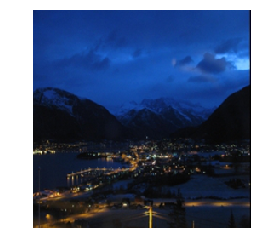

In [5]:
display(a)

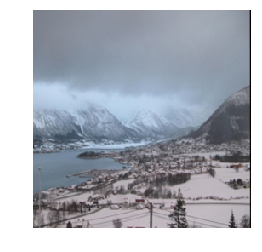

In [6]:
display(b)

# Architecture
![img](./images/cgan.PNG)

In [7]:
from models.pix2pix_model import Pix2PixModel

conditional_gan = Pix2PixModel()
conditional_gan.initialize(opt)
conditional_gan.setup(opt)

initialize network with normal
initialize network with normal


# G(x)

Classic encoder/decoder + skip connections!

![image](./images/unet.PNG)

In [8]:
conditional_gan.netG

UnetGenerator(
  (model): UnetSkipConnectionBlock(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): UnetSkipConnectionBlock(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace)
          (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): UnetSkipConnectionBlock(
            (model): Sequential(
              (0): LeakyReLU(negative_slope=0.2, inplace)
              (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
              (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (3): UnetSkipConnectionBlock(
                (model): Sequential(
                  (0): LeakyReLU(negative_slope=0.2, inplace)
                  (1): Conv2d(256, 512, kernel_size=(4

# D(x)

In [9]:
conditional_gan.netD

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (12): Sigmoid()
  )
)

See https://arxiv.org/pdf/1604.04382.pdf for more on PatchGAN loss?

In [10]:
conditional_gan.netD

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (12): Sigmoid()
  )
)

# Loss - Discriminator

In [11]:
conditional_gan.criterionGAN

GANLoss(
  (loss): BCELoss()
)

In [12]:
conditional_gan.backward_D??

# Loss - Generator

In [13]:
conditional_gan.criterionL1

L1Loss()

In [14]:
conditional_gan.backward_G??

# DO IT LIVE!!!

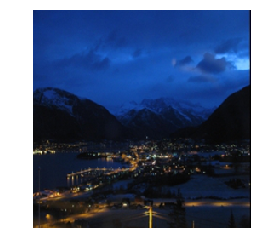

In [21]:
# Remember what the input looked like
display(a)

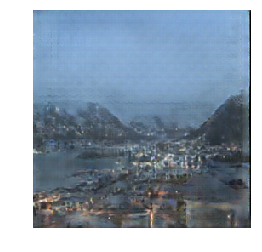

In [22]:
conditional_gan.set_input(datum)
conditional_gan.forward()
v = conditional_gan.get_current_visuals()
display(v['fake_B'].detach())

# Shortcomings

- Needs paired training data (images of _the same thing_ in different domains)

# Step 2: CycleGAN

Same everywhere except theres 2!

In [24]:
from nathan.dataset import load_cyclegan_dataset

In [25]:
cyclegan_data = load_cyclegan_dataset()

for datum in cyclegan_data:
    break

a, b = datum['A'], datum['B']

dataset [UnalignedDataset] was created


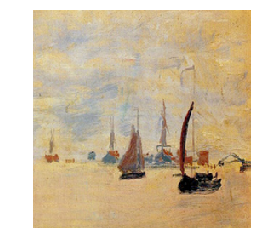

In [26]:
display(a)

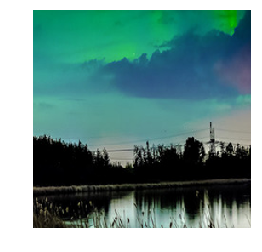

In [27]:
display(b)

Attempts to load weights:

In [13]:
from nathan.less_dumb_opts import Opt
opt = Opt()

loading the model from /data2/nathan/omgjustwork/0_net_G.pth
loading the model from /data2/nathan/omgjustwork/0_net_D.pth
Skipping D because 0_net_D.pth not found. That part of the model will be bad
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
[Network D] Total number of parameters : 2.769 M
-----------------------------------------------
